# Analise Exploratoria

📦 Importando as bibliotecas

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de Gráfico
sns.set(style="whitegrid")

# Importando o CSV
df = pd.read_csv('dataset_vendas.csv', sep=';')

🔍 Visão geral do dataset

In [76]:
df.shape # Mostra a quantidade de linhas e colunas do DataFrame(DF)

(1000, 6)

In [77]:
df.columns # Verificando as colunas

Index(['ID_Pedido', 'Data_Compra', 'Cliente_ID', 'Valor_Total',
       'Categoria_Produto', 'Quantidade'],
      dtype='object')

In [78]:
df.dtypes # Verificando os tipos de dados

ID_Pedido              int64
Data_Compra           object
Cliente_ID             int64
Valor_Total          float64
Categoria_Produto     object
Quantidade             int64
dtype: object

In [79]:
df.info() # Informações gerais do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Pedido          1000 non-null   int64  
 1   Data_Compra        1000 non-null   object 
 2   Cliente_ID         1000 non-null   int64  
 3   Valor_Total        1000 non-null   float64
 4   Categoria_Produto  1000 non-null   object 
 5   Quantidade         1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [93]:
df['Data_Compra'] = pd.to_datetime(df['Data_Compra'], errors='coerce') # Convertendo o type da coluna Data_Compra para datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Pedido          992 non-null    int64         
 1   Data_Compra        992 non-null    datetime64[ns]
 2   Cliente_ID         992 non-null    int64         
 3   Valor_Total        992 non-null    float64       
 4   Categoria_Produto  992 non-null    object        
 5   Quantidade         992 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 54.2+ KB


In [81]:
df.head() # Visualiza as 5 primeiras linhas do DataFrame

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
0,1001,2024-01-01,551,607.50,Roupas,1
1,1002,2024-01-02,592,758.17,Beleza,2
2,1003,2024-01-05,514,460.08,Roupas,6
3,1004,2024-01-04,571,171.20,Eletrônicos,5
4,1005,2024-01-05,560,319.59,Beleza,7


In [82]:
df.tail() # Últimas 5 linhas do DataFrame

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
995,1996,2026-09-22,509,834.76,Beleza,4
996,1997,2026-09-23,566,792.93,Esportes,3
997,1998,2026-09-24,517,723.31,Beleza,3
998,1999,2026-09-25,599,84.35,Beleza,3
999,2000,2026-09-26,585,337.97,Eletrônicos,6


🧼 Verificação e tratamento de dados faltantes

In [83]:
df.isnull().sum() # Verificando valores nulos.

ID_Pedido            0
Data_Compra          8
Cliente_ID           0
Valor_Total          0
Categoria_Produto    0
Quantidade           0
dtype: int64

In [84]:
df.dropna(inplace=True) # Removendo linhas com valores nulos.

📊 Estatísticas descritivas

In [85]:
df.describe(include='all') # Mostra as estatísticas gerais do DataFrame

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
count,992.000000,992,992.000000,992.000000,992,992.000000
unique,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,Esportes,NaN
freq,NaN,NaN,NaN,NaN,219,NaN
mean,1499.264113,2025-04-29 05:23:42.580645120,549.179435,525.682792,NaN,4.945565
min,1001.000000,2024-01-01 00:00:00,500.000000,54.400000,NaN,1.000000
25%,1250.750000,2024-09-03 12:00:00,523.000000,275.595000,NaN,3.000000
50%,1498.500000,2025-05-07 00:00:00,550.000000,534.640000,NaN,5.000000
75%,1749.250000,2026-01-17 12:00:00,574.000000,757.105000,NaN,7.000000
max,2000.000000,2026-09-26 00:00:00,599.000000,999.440000,NaN,9.000000


🔢 Análise de variáveis numéricas

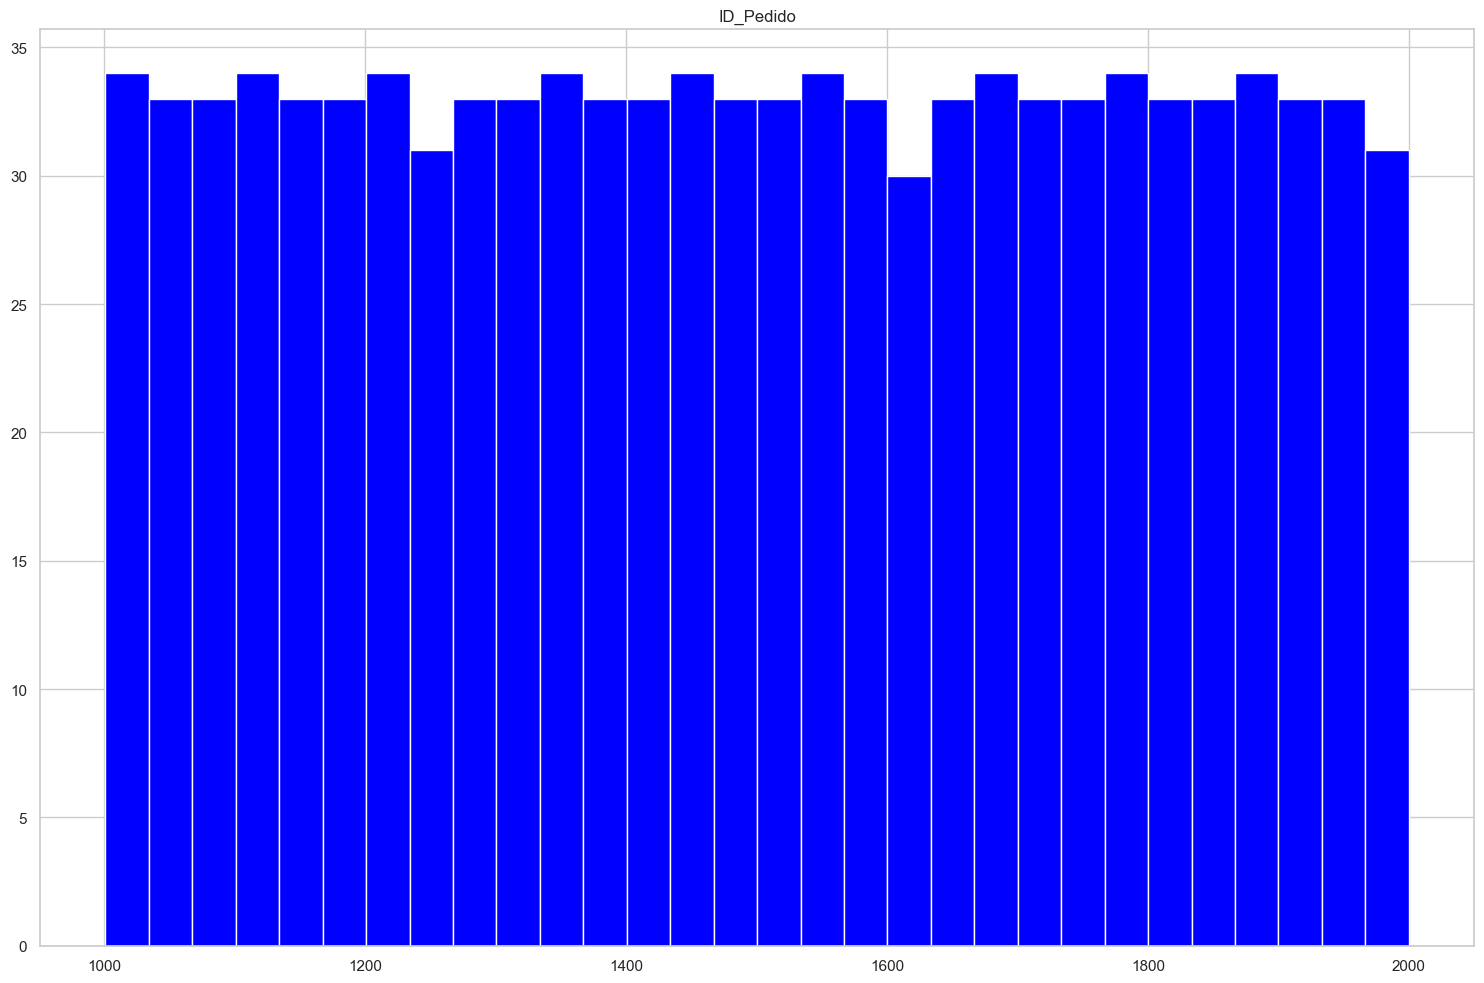

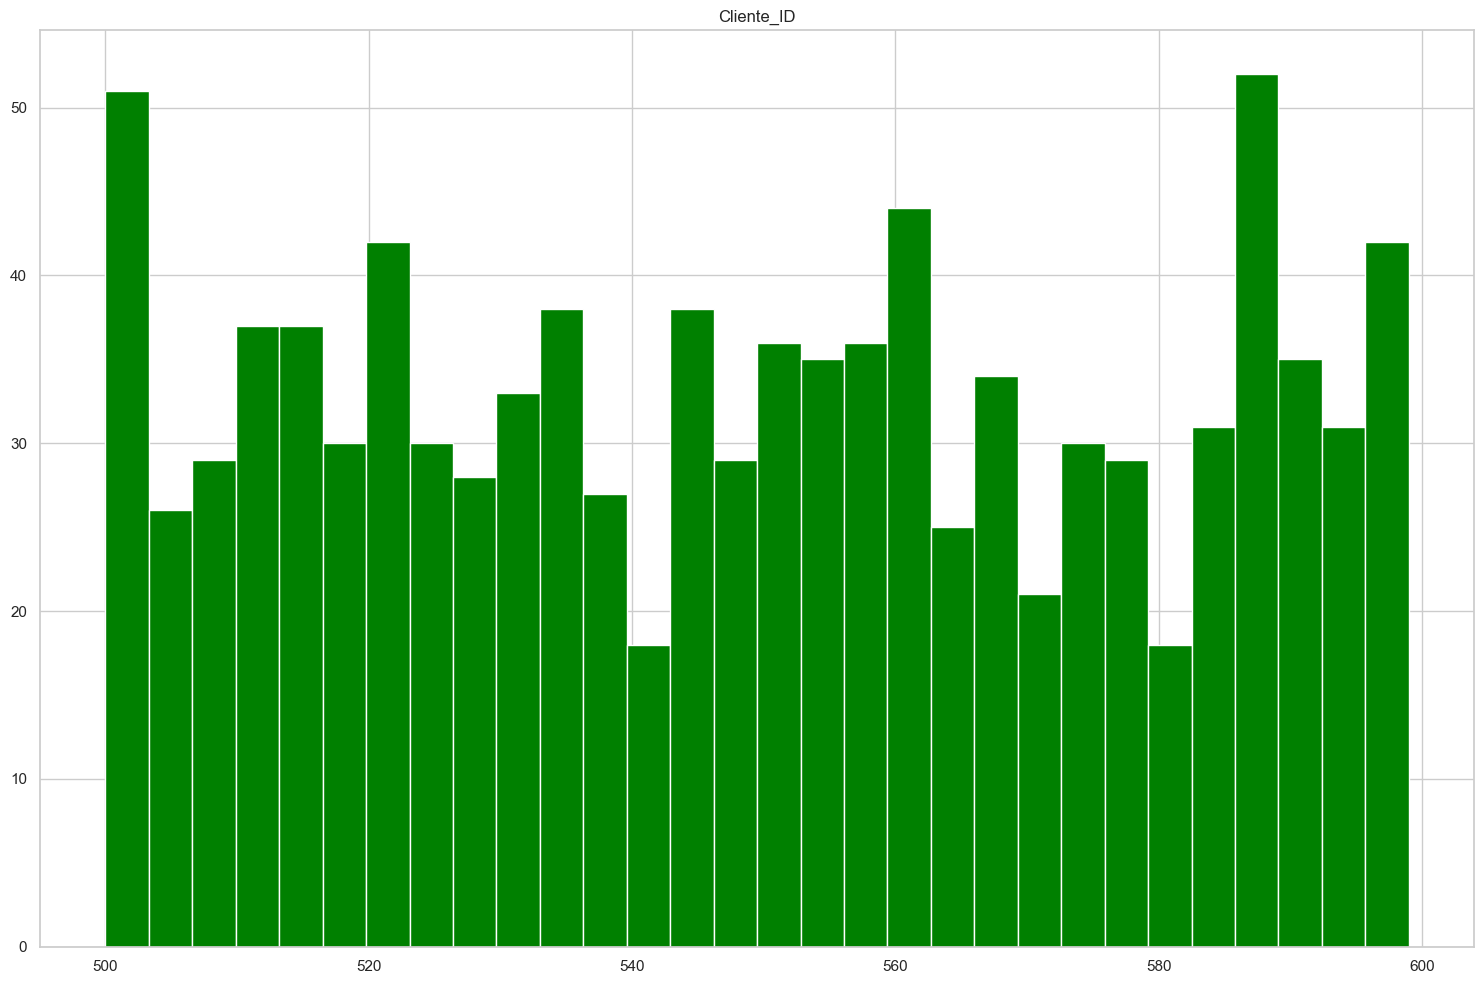

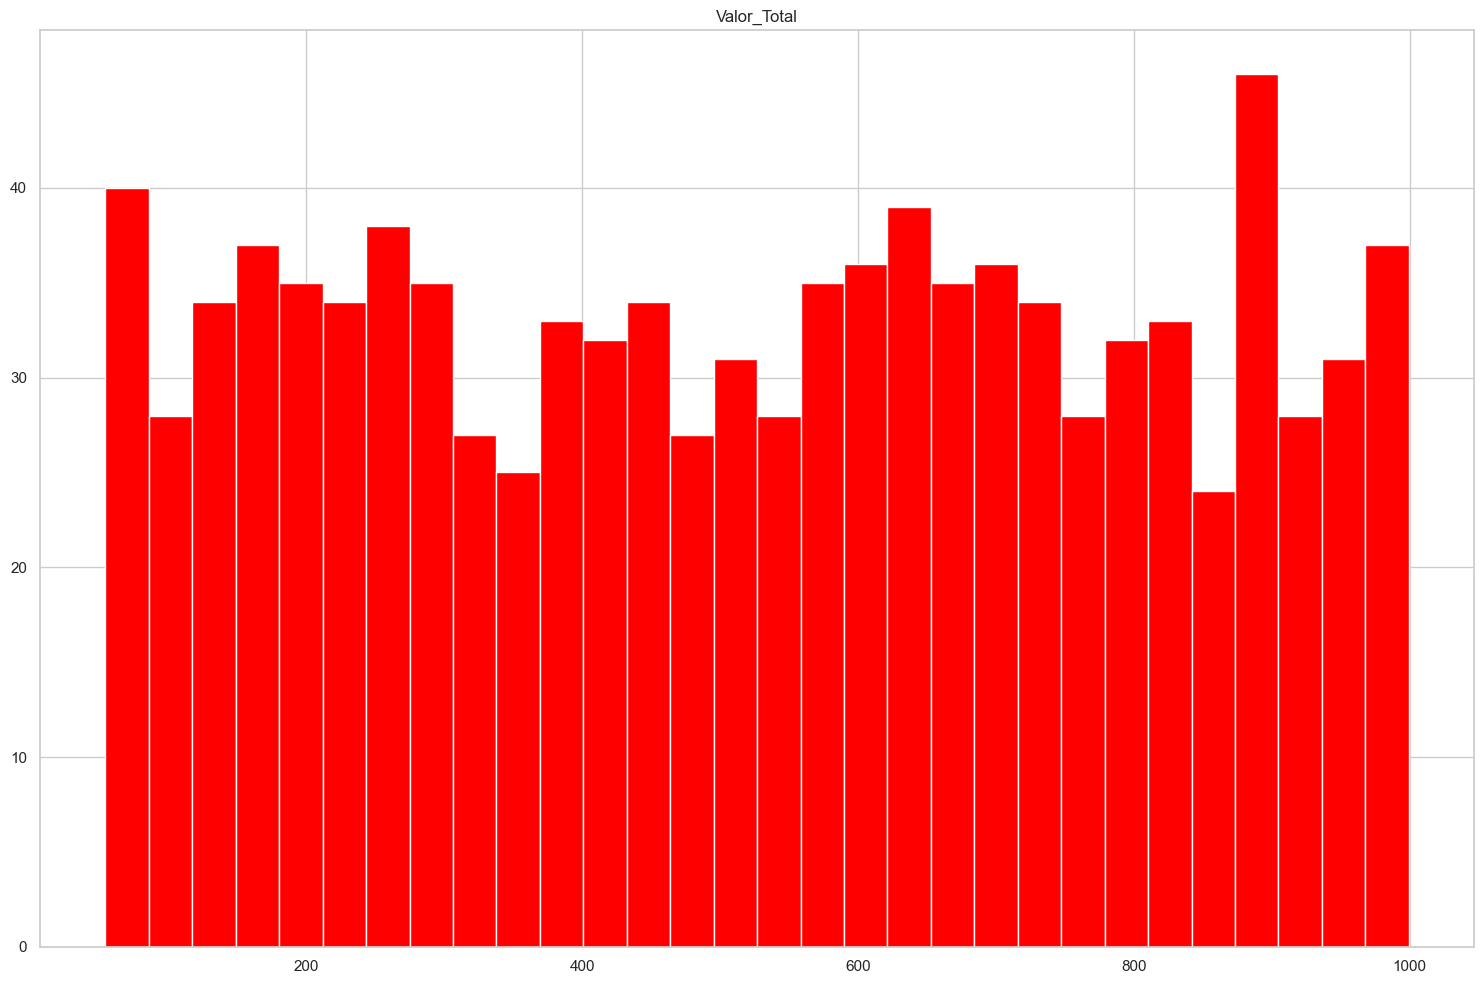

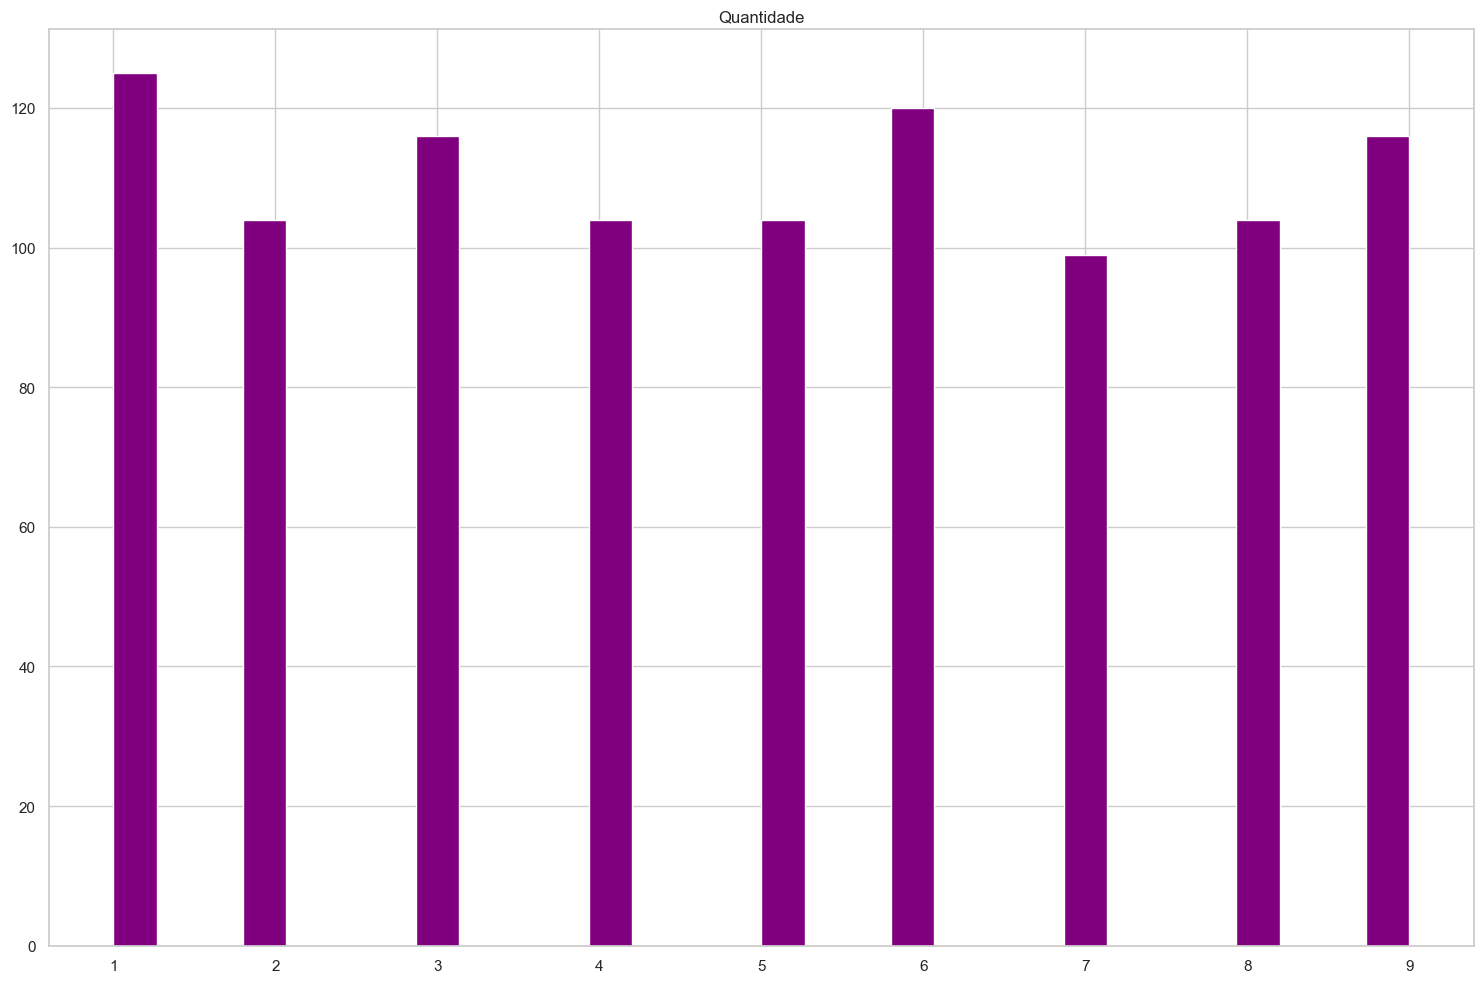

In [86]:
# df.select_dtypes(include='number').hist(figsize=(15,10), bins=30) # Histograma para as colunas numéricas
# plt.tight_layout() # Ajusta o layout para evitar certas sobreposições

colors = ['blue', 'green', 'red', 'purple']  # Define a lista de cores
numeric_columns = df.select_dtypes(include='number').columns  # Seleciona as colunas numéricas

for i, column in enumerate(numeric_columns):
    df[column].hist(figsize=(15, 10), bins=30, color=colors[i % len(colors)])  # Aplica a cor correspondente
    plt.title(column)  # Adiciona título ao gráfico
    plt.tight_layout()
    plt.show()

🔠 Análise de variáveis categóricas

In [87]:
for col in df.select_dtypes(include='object'):
    print(df[col].value_counts())
    print("-" * 40)


Categoria_Produto
Esportes       219
Beleza         204
Eletrônicos    199
Casa           189
Roupas         181
Name: count, dtype: int64
----------------------------------------


📉 Correlações

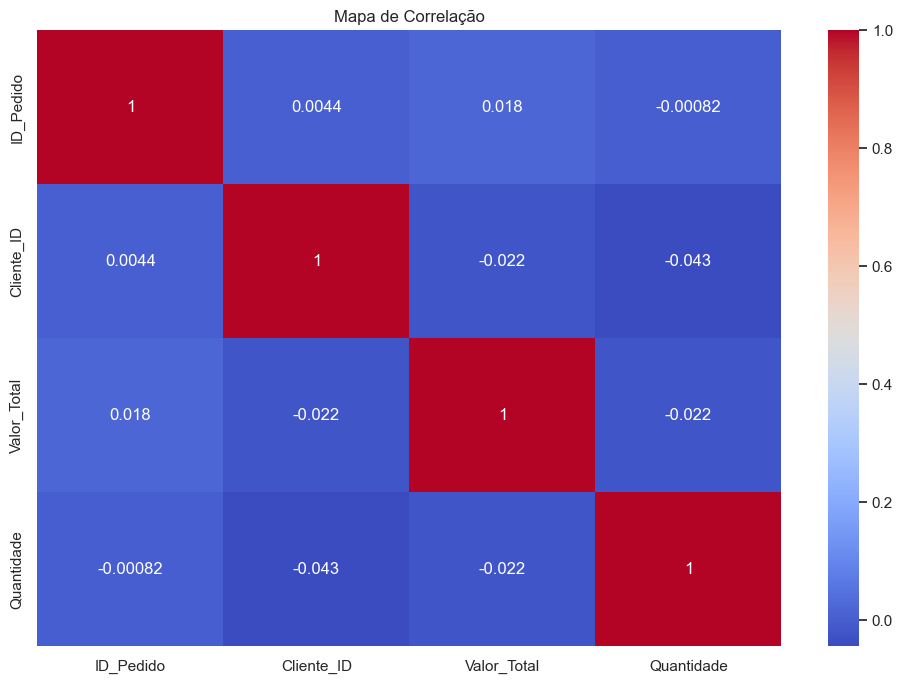

In [88]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação")
plt.show()

📌 Outliers (usando boxplots)

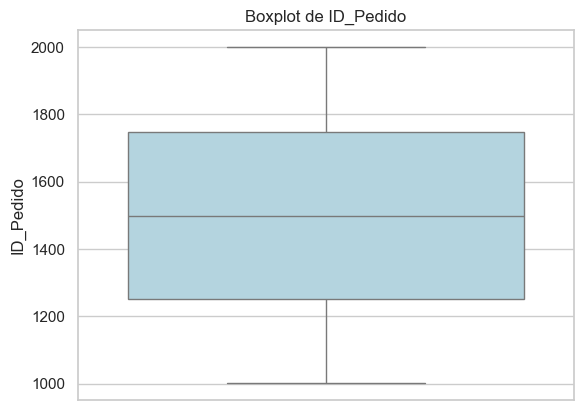

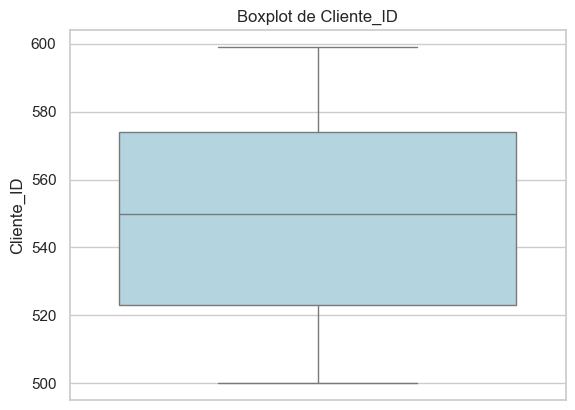

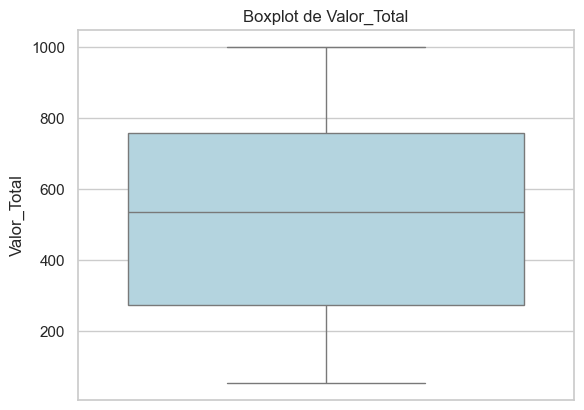

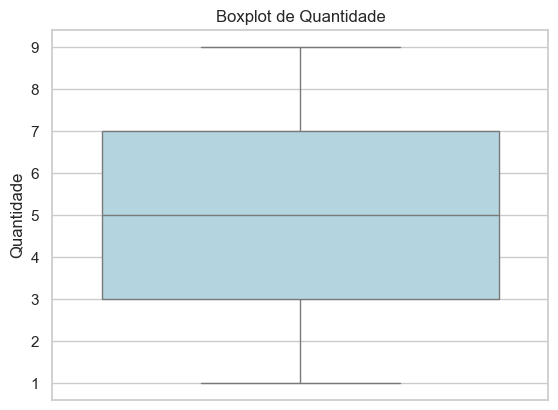

In [89]:
for col in df.select_dtypes(include='number'):

    sns.boxplot(data=df[col], color='lightblue')
    plt.title(f"Boxplot de {col}")
    plt.show()

📈 Relacionamentos entre variáveis

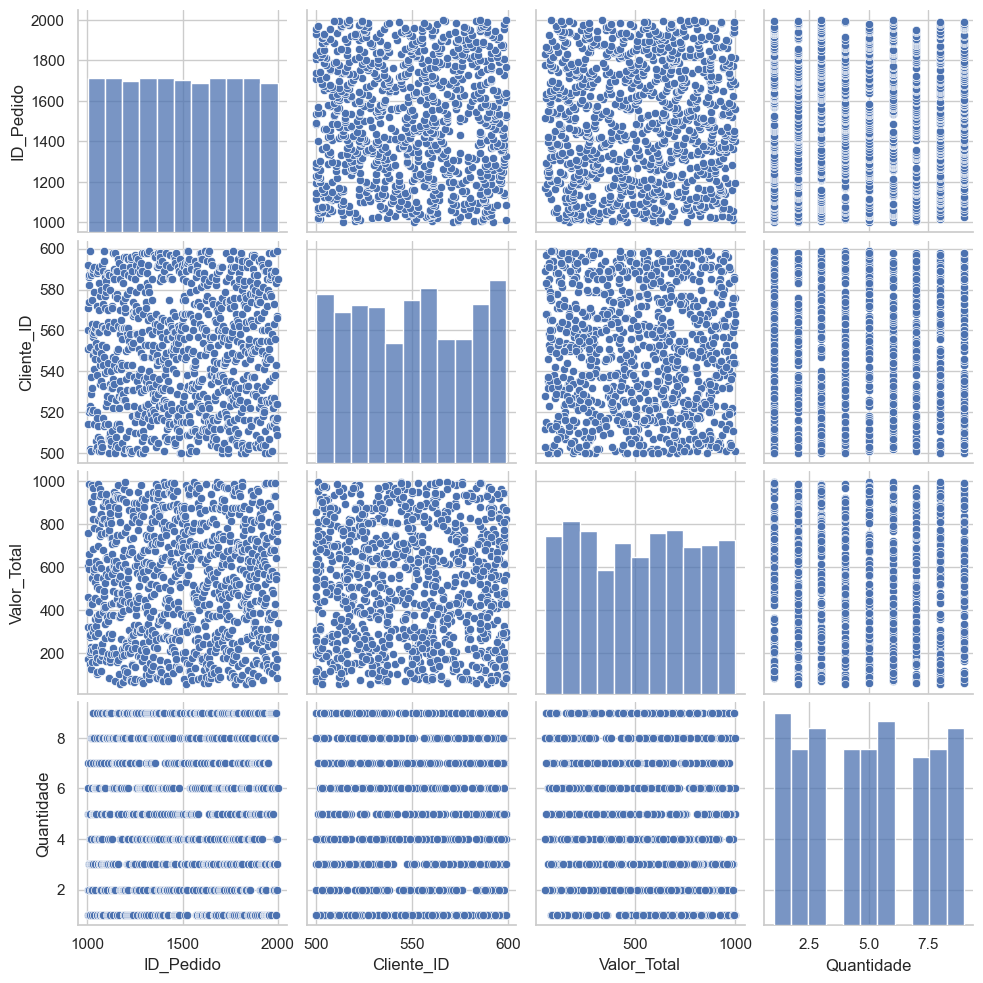

In [90]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

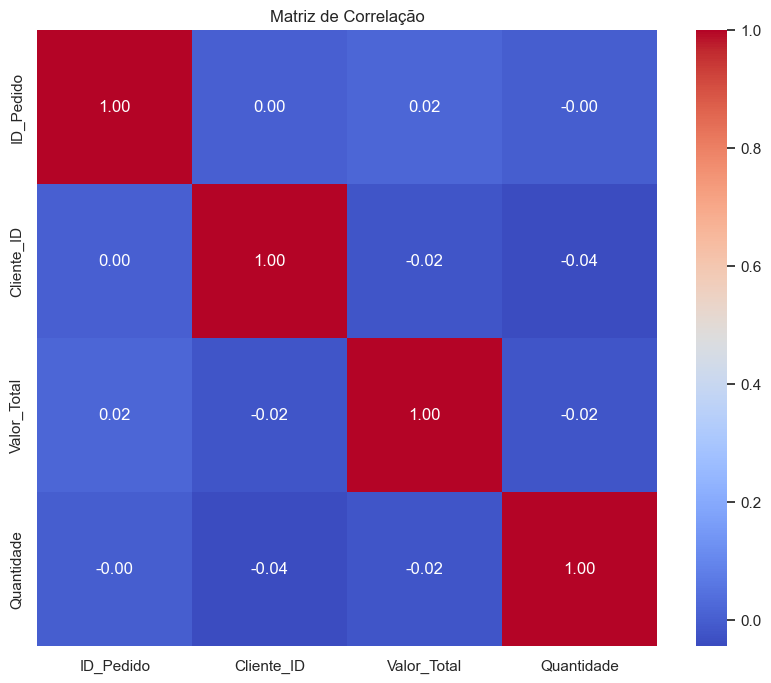

In [91]:
# Matriz de correlação
correlation = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()